## ORGANS: Distance between Donor + Candidate

This notebook contains analysis of the distance traveled by livers from donor to candidate.

---

### Initialize environment

In [2]:
library(tidyverse)

In [3]:
root_path     <- here::here()
data_path     <- paste0(root_path, "/01_data")
analysis_path <- paste0(root_path, "/02_analysis")

In [4]:
setwd(data_path)

transplant <- readRDS("clean/transplant_clean.rds")

setwd(analysis_path)

---

### Calculate distribution of distance for don-to-can travel

In [5]:
d2cDistByYear <- transplant %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021) %>%
  group_by(REC_TX_DT_YEAR) %>%
  summarise(p10 = quantile(CAN_DON_DISTANCE, 0.10, na.rm = T) / 1609,
            p25 = quantile(CAN_DON_DISTANCE, 0.25, na.rm = T) / 1609,
            p50 = quantile(CAN_DON_DISTANCE, 0.50, na.rm = T) / 1609,
            p75 = quantile(CAN_DON_DISTANCE, 0.75, na.rm = T) / 1609,
            p90 = quantile(CAN_DON_DISTANCE, 0.90, na.rm = T) / 1609)

write.csv(x = d2cDistByYear,
          file = "output/tables/table4-donor_to_candidate_distance.csv",
          row.names = F)

d2cDistByYear

REC_TX_DT_YEAR,p10,p25,p50,p75,p90
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018,1.431166,11.54316,83.65153,238.8226,470.8435
2019,1.641784,13.39842,85.00240,238.3891,466.8505
2020,5.682179,46.32521,154.36931,336.3498,503.8706
2021,6.719108,50.90667,162.86267,347.7582,508.0493


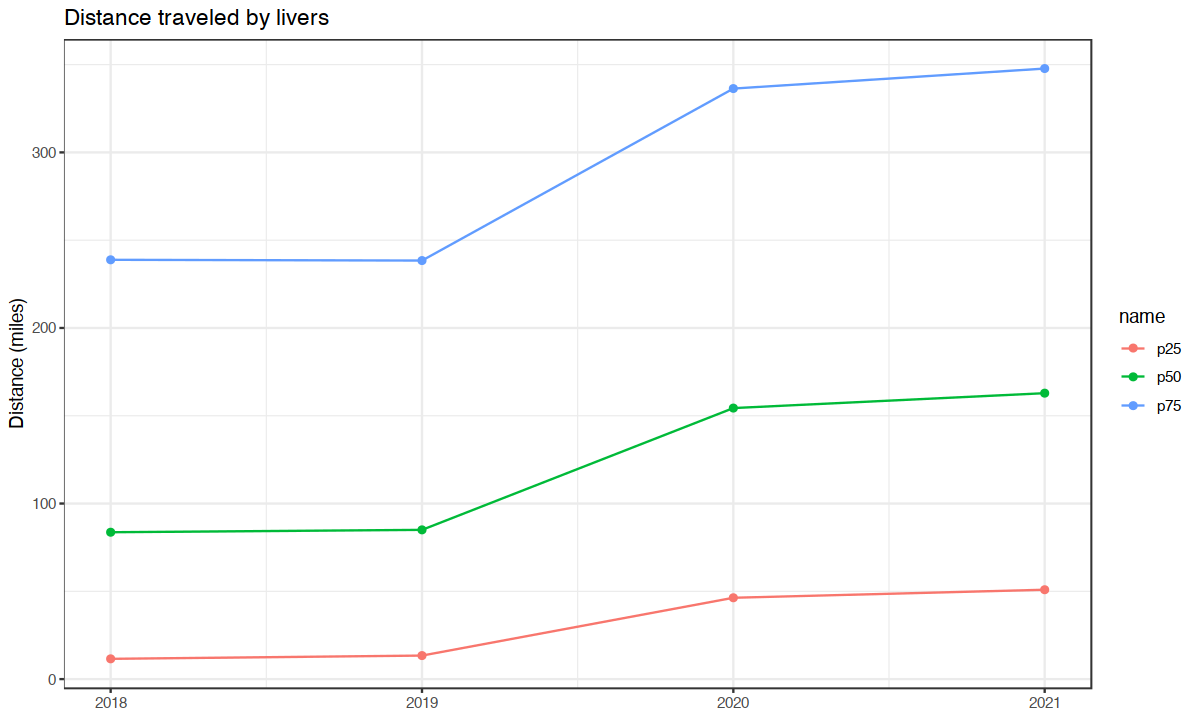

In [6]:
options(repr.plot.width = 10, repr.plot.height = 6)

d2cDistByYear %>%
  pivot_longer(-REC_TX_DT_YEAR) %>%
  filter(grepl("25|50|75", name)) %>%
  ggplot(aes(x = REC_TX_DT_YEAR, y = value, color = name)) +
  geom_line() +
  geom_point() +
  scale_x_continuous(name = NULL) +
  scale_y_continuous(name = "Distance (miles)") +
  labs(title = "Distance traveled by livers") +
  theme_bw()

In [7]:
txTraveling200mi <- transplant %>%
  filter(REC_TX_DT_YEAR %in% 2018:2021, !is.na(CAN_DON_DISTANCE)) %>%
  count(REC_TX_DT_YEAR, LONG_DIST_TRAVELED = if_else((CAN_DON_DISTANCE / 1609) >= 200, "200mi_or_more", "less_than_200mi"),
        name = "TX") %>%
  group_by(REC_TX_DT_YEAR) %>%
  mutate(PCT = TX / sum(TX)) %>%
  ungroup() %>%
  pivot_wider(id_cols = REC_TX_DT_YEAR, names_from = LONG_DIST_TRAVELED, values_from = c("TX", "PCT"))

write.csv(x = txTraveling200mi,
          file = "output/tables/table4-transplants_traveling_200mi_or_more.csv",
          row.names = F)

txTraveling200mi

REC_TX_DT_YEAR,TX_200mi_or_more,TX_less_than_200mi,PCT_200mi_or_more,PCT_less_than_200mi
<dbl>,<int>,<int>,<dbl>,<dbl>
2018,2184,5164,0.2972237,0.7027763
2019,2336,5564,0.2956962,0.7043038
2020,3338,4640,0.4184006,0.5815994
2021,3589,4650,0.4356111,0.5643889
